### step1 : Íµ¨Í∏ÄÏùò ÌååÏù¥Ïç¨ API Ïù∏ÌÑ∞ÌéòÏù¥Ïä§ Î™®ÎìàÏùÑ ÏïÑÎûòÏôÄ ÏÑ§Ïπò

```
$ pip install --upgrade google-api-python-client
$ pip install google-cloud-vision
```

### step2 : Google Cloud Vision API ÏÇ¨Ïö©
Î∏åÎùºÏö∞Ï†ÄÏóêÏÑú Îã§Ïö¥Î°úÎìúÌïú Ïù∏Ï¶ùÌÇ§Îäî `my_google_api_key.json`Ïù¥ÎùºÎäî ÌååÏùºÎ™ÖÏúºÎ°ú Î≥ÄÍ≤Ω

### step3 API ÏÇ¨Ïö© ÌÖåÏä§Ìä∏

In [3]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [4]:
# Î°úÏª¨ ÌôòÍ≤ΩÏóêÏÑúÎäî Îã§Ïö¥Î∞õÏùÄ Ïù∏Ï¶ùÌÇ§ Í≤ΩÎ°úÍ∞Ä Ï†ïÌôïÌïòÍ≤å ÏßÄÏ†ïÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§. 
# ÌÅ¥ÎùºÏö∞Îìú ÌôòÍ≤ΩÏóêÏÑúÎäî Î¨¥ÏãúÌï¥ÎèÑ Ï¢ãÏäµÎãàÎã§
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/chatbot-app-277104-fac47ea59157.json'

# ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°úÎ•º ÏßÄÏ†ïÌï¥ Ï£ºÏÑ∏Ïöî.
# (ÏòàÏãú) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path = os.getenv('HOME')+'/aiffel/ocr_python/handwriting.jpg'   

# ÏúÑÏóêÏÑú Ï†ïÏùòÌïú OCR API Ïù¥Ïö© Ìï®ÏàòÎ•º Ìò∏Ï∂úÌï¥ Î¥ÖÏãúÎã§.
detect_text(path)

-rw-r--r-- 1 root root 2325 Sep 13 16:08 /aiffel/aiffel/ocr_python/chatbot-app-277104-fac47ea59157.json
Texts:

"Loan Number
20134613.
Today date's
Customer ID ‚Üí sog475127
2-28-2019
572437-72, 75,000.00
Amounit
Account Nomber -‚Üí 193506555
Nane
RomANO UNIT 100 LC
"

"Loan"

"Number"

"20134613."

"Today"

"date's"

"Customer"

"ID"

"‚Üí"

"sog475127"

"2-28-2019"

"572437-72,"

"75,000.00"

"Amounit"

"Account"

"Nomber"

"-‚Üí"

"193506555"

"Nane"

"RomANO"

"UNIT"

"100"

"LC"
bounds: (1541,986),(1715,966),(1722,1029),(1548,1049)


## Ïñ¥Îñ§ Í≥ºÏ†ïÏúºÎ°ú ÏùΩÏùÑÍπåÏöî?
Íµ¨Í∏Ä APIÏóêÏÑúÎäî Î¨∏ÏûêÏùò ÏòÅÏó≠ÏùÑ ÏÇ¨Í∞ÅÌòïÏúºÎ°ú ÌëúÌòÑÌïòÍ≥† Ïö∞Ï∏°Ïóê BlockÍ≥º ParagraphÎ°ú Íµ¨Î∂ÑÌï¥ÏÑú Ïù∏Ïãù Í≤∞Í≥ºÎ•º ÎÇòÌÉÄÎÇ¥Í≥† ÏûàÏóàÎã§.  
Íµ¨Í∏Ä APIÍ∞Ä Ïù¥ÎØ∏ÏßÄÏóê Î∞ïÏä§Î•º Ïπú Îã§Ïùå Î∞ïÏä§Î≥Ñ ÌÖçÏä§Ìä∏Ïùò ÎÇ¥Ïö©ÏùÑ ÏïåÎ†§Ï§Ä Í≤ÉÏ≤òÎüº, Î¨∏Ïûê Î™®Îç∏ÏùÄ Î≥¥ÌÜµ Îëê Îã®Í≥ÑÎ°ú Ïù¥Î§ÑÏßÑÎã§.
1. Text Detection(Î¨∏ÏûêÍ≤ÄÏ∂ú) :  Î®ºÏ†Ä ÏûÖÎ†•Î∞õÏùÄ ÏÇ¨ÏßÑ ÏÜçÏóêÏÑú Î¨∏ÏûêÏùò ÏúÑÏπòÎ•º Ï∞æÏïÑÎÇ∏Îã§.
2. Text Recognition(Î¨∏ÏûêÏù∏Ïãù) : Ï∞æÏùÄ Î¨∏Ïûê ÏòÅÏó≠ÏúºÎ°úÎ∂ÄÌÑ∞ Î¨∏ÏûêÎ•º ÏùΩÏñ¥ÎÇ¥Îäî Í≤É

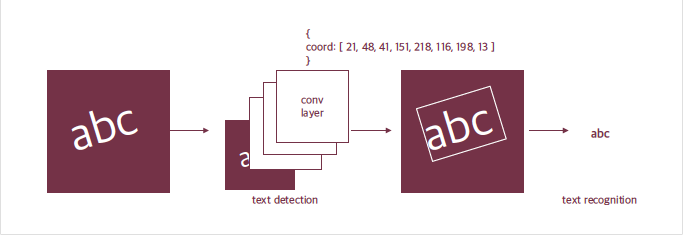  
[Ï∂úÏ≤ò: https://brunch.co.kr/@kakao-it/318]

Î¨∏ÏûêÏùò ÏòÅÏó≠ÏùÑ ÌëúÌòÑÌïòÎäî Î∞©Î≤ïÏúºÎ°ú ÏÇ¨Í∞ÅÌòïÏùò ÎÑ§ Íº≠ÏßìÏ†ê Ï¢åÌëúÎ•º ÏïåÎ†§ Ï£ºÎäî Î∞©Î≤ïÏùÑ Ï†úÏãúÌïòÍ≥† ÏûàÎã§.  
Î∞ëÏóêÎäî Ïù¥Îü∞ Î∞©Î≤ïÏùÑ Ïó∞Íµ¨Ìïú ÎßéÏùÄ ÎÖºÎ¨∏Îì§ Ï§ë ÌïòÎÇòÏù¥Îã§.
https://www.mdpi.com/2079-9292/9/1/117/pdf

## Îî•Îü¨Îãù Î¨∏ÏûêÏù∏ÏãùÏùò ÏãúÏûë
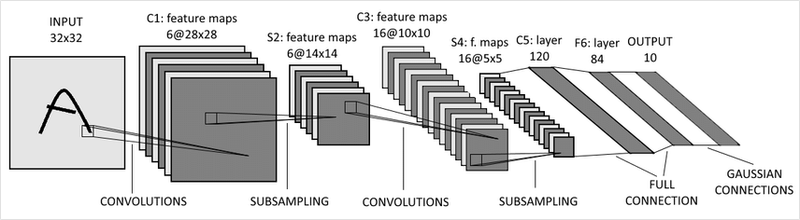  
[Ï∂úÏ≤ò: http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf]

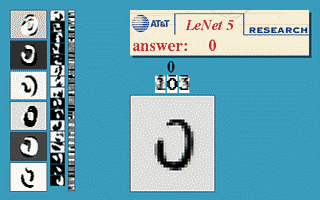  
[Ï∂úÏ≤ò: http://yann.lecun.com/exdb/lenet/stroke-width.html]


(Stroke Width Invariance)[http://yann.lecun.com/exdb/lenet/stroke-width.html]  
(Robustness to Noise)[http://yann.lecun.com/exdb/lenet/noisy-2.html]  


## ÏÇ¨ÏßÑ ÏÜç Î¨∏Ïûê Ï∞æÏïÑÎÇ¥Í∏∞ - detection
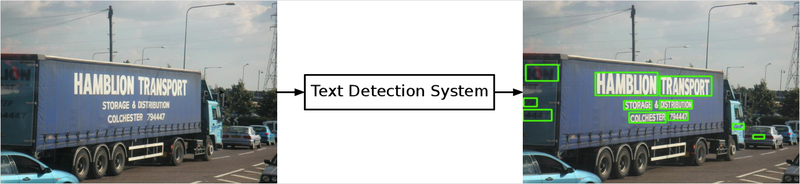  
[Ï∂úÏ≤ò: https://www.semanticscholar.org/paper/End-To-End-Text-Detection-Using-Deep-Learning-Ibrahim/6d8584a900bd77afec55921c2d2d1cb6f1244b25/figure/0]

ÏÇ¨ÏßÑ ÏÜç Î¨∏ÏûêÎ•º Ï∞æÏïÑÎÇ¥Îäî ÏµúÍ∑ºÏùò Îî•Îü¨Îãù Î™®Îç∏ÏùÄ ÏùºÎ∞òÏ†ÅÏù∏ Object Detection(Í∞ùÏ≤¥ Ïù∏Ïãù) Î∞©Î≤ïÏúºÎ°ú Ï†ëÍ∑ºÌïúÎã§.  
Îî•Îü¨Îãù Í∏∞Î∞ò Í∞ùÏ≤¥ Í≤ÄÏ∂ú Î∞©Î≤ïÏóêÎäî Regression(ÌöåÍ∑Ä) Î∞©ÏãùÏù¥ÎÇò Segmentation(ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò) Î∞©ÏãùÏù¥ ÏûàÎã§.  
- RegressionÏùÄ Í∏∞Ï§ÄÏúºÎ°ú ÌïòÎäî Î∞ïÏä§ ÎåÄÎπÑ Î¨∏ÏûêÏùò Î∞ïÏä§Í∞Ä ÏñºÎßàÎÇò Ï∞®Ïù¥Í∞Ä ÎÇòÎäîÏßÄÎ•º ÌïôÏäµÌïúÎã§. 
- SegmentationÏùÄ ÌîΩÏÖÄ Îã®ÏúÑÎ°ú Ìï¥Îãπ ÌîΩÏÖÄÏù¥ Î¨∏ÏûêÎ•º ÌëúÌòÑÌïòÎäîÏßÄÎ•º Î∂ÑÎ•òÌïòÎäî Î¨∏Ï†ú(pixel-wise classification)ÎùºÍ≥† Î≥º Ïàò ÏûàÎã§.

[Îî•Îü¨ÎãùÏùÑ ÌôúÏö©Ìïú Í∞ùÏ≤¥ ÌÉêÏßÄ ÏïåÍ≥†Î¶¨Ï¶ò Ïù¥Ìï¥ÌïòÍ∏∞](https://blogs.sas.com/content/saskorea/2018/12/21/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84-%ED%99%9C%EC%9A%A9%ED%95%9C-%EA%B0%9D%EC%B2%B4-%ED%83%90%EC%A7%80-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0/)

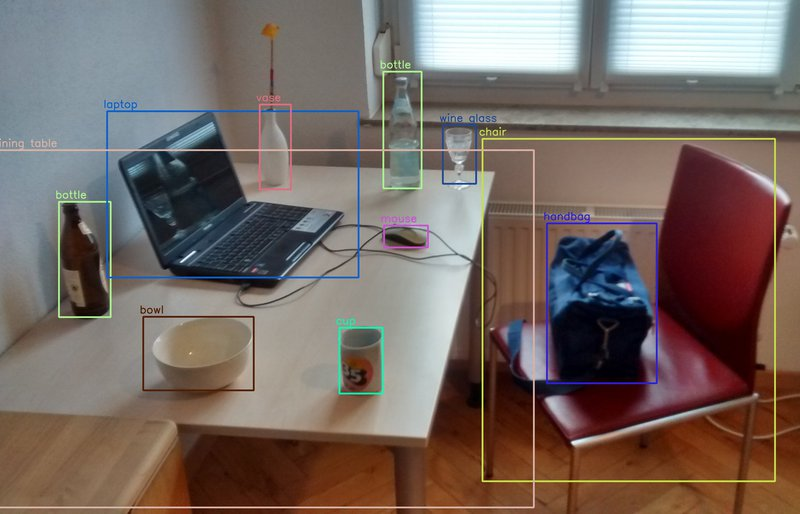  
[Ï∂úÏ≤ò : https://it.wikipedia.org/wiki/File:Detected-with-YOLO--Schreibtisch-mit-Objekten.jpg]



## ÏÇ¨ÏßÑ ÏÜç Î¨∏Ïûê ÏùΩÏñ¥ÎÇ¥Í∏∞ - recognition
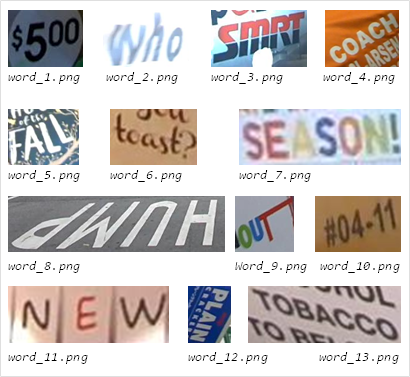  
[Ï∂úÏ≤ò: ICDAR (https://rrc.cvc.uab.es/?ch=4&com=tasks)]

Î¨∏Ïûê Ïù∏ÏãùÏùÄ ÏÇ¨ÏßÑ ÏÜçÏóêÏÑú Î¨∏ÏûêÎ•º Í≤ÄÏ∂úÌï¥ÎÇ¥Îäî Í≤ÄÏ∂ú Î™®Îç∏Ïù¥ ÏòÅÏó≠ÏùÑ ÏûòÎùºÏÑú Ï£ºÎ©¥ Í∑∏ ÏòÅÏó≠Ïóê Ïñ¥Îñ§ Í∏ÄÏûêÍ∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎäîÏßÄ ÏùΩÏñ¥ÎÇ¥Îäî Í≥ºÏ†ïÏù¥Îã§.  
Ïù¥ Í≥ºÏ†ïÏùÄ Ïù¥ÎØ∏ÏßÄ Î¨∏Ï†úÎ≥¥Îã§Îäî ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ÏóêÏÑú ÎßéÏùÄ ÏòÅÍ∞êÏùÑ Î∞õÏïòÏúºÎ©∞, Ïù¥ÎØ∏ÏßÄ ÎÇ¥Ïùò Î¨∏Ïûê Ïù∏Ïãù Î™®Îç∏Ïùò Í∏∞Î≥∏Ï†ÅÏù∏ Î∞©Î≤ï Ï§ë ÌïòÎÇòÍ∞Ä Î∞îÎ°ú CNNÍ≥º RNNÏùÑ Í≤∞Ìï©Ìïú CRNN Î™®Îç∏Ïù¥Îã§. Ïù¥ÎØ∏ÏßÄ ÎÇ¥Ïùò ÌÖçÏä§Ìä∏ÏôÄ Ïó∞Í¥ÄÎêú ÌäπÏßïÏùÑ CNNÏùÑ ÌÜµÌï¥ Ï∂îÏ∂úÌïú ÌõÑÏóê Ïä§ÌÖù Îã®ÏúÑÏùò Î¨∏Ïûê Ï†ïÎ≥¥Î•º RNNÏúºÎ°ú Ïù∏ÏãùÌïòÎäî Í≤ÉÏù¥Îã§.

[ÎÑ§Ïù¥Î≤Ñ Îç∞Î∑∞ 2018, Ïù¥ÌôúÏÑùÎãòÏùò CRAFT Î™®Îç∏ÏÜåÍ∞úÏôÄ Ïó∞Íµ¨ Í≤ΩÌóò](https://tv.naver.com/v/4578167)  
[Terry TaeWoong UmÎãòÏùò ÏÇ¨ÏßÑ ÏÜç Í∏ÄÏûê ÏùΩÍ∏∞, OCR (Optical character recognition)](https://www.youtube.com/watch?v=ckRFBl_XWFg)

## keras-ocr Ïç®Î≥¥Í∏∞
`keras-ocr`ÏùÄ ÌÖêÏÑúÌîåÎ°úÏö∞Ïùò ÏºÄÎùºÏä§ APIÎ•º Í∏∞Î∞òÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ ÏÜç Î¨∏ÏûêÎ•º ÏùΩÎäî End-to-End OCRÏùÑ Ìï† Ïàò ÏûàÍ≤å Ìï¥Ï§ÄÎã§.  
Í≥µÏãù Î¨∏ÏÑúÏóêÎèÑ ÎÇòÏôÄ ÏûàÎìØ, Í≤ÄÏ∂ú Î™®Îç∏Î°úÎäî ÎÑ§Ïù¥Î≤Ñ Îç∞Î∑∞ 2018 ÏòÅÏÉÅÏóêÏÑú ÏÜåÍ∞úÌïú CRAFT(Character Region Awareness for Text Detection)Î•º ÏÇ¨Ïö©ÌïòÍ≥†, Ïù∏Ïãù Î™®Îç∏Î°úÎäî ÏïûÏóêÏÑú ÏÑ§Î™ÖÌïú CRNNÏùÑ ÏÇ¨Ïö©ÌïúÎã§.

keras-ocr Î≤ÑÏ†ÑÏùÑ ÌÅ¥ÎùºÏö∞Îìú ÏâòÏóêÏÑú ÌôïÏù∏Ìï¥Î≥¥Ïûê.
```
$ pip list | grep keras-ocr
```

ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Ïù∏ `keras_ocr` Í≥º Ïù∏Ïãù Í≤∞Í≥ºÏùò ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú `matplotlib.pyplot` Î•º Î∂àÎü¨Ïò®Îã§. 
`keras_ocr.pipeline.Pipeline()`Îäî Ïù∏ÏãùÏùÑ ÏúÑÌïú ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÏÉùÏÑ±ÌïòÎäîÎç∞, 
Ïù¥Îïå Ï¥àÍ∏∞Ìôî Í≥ºÏ†ïÏóêÏÑú ÎØ∏Î¶¨ ÌïôÏäµÎêú Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπò(weight)Î•º Î∂àÎü¨Ïò§Í≤å ÎêúÎã§. 
Í≤ÄÏ∂úÍ∏∞ÏôÄ Ïù∏ÏãùÍ∏∞Î•º ÏúÑÌïú Í∞ÄÏ§ëÏπò ÌïòÎÇòÏî©ÏùÑ Î∂àÎü¨Ïò§Ïûê.

[keras ocr Í≥µÏãùÎ¨∏ÏÑú](https://keras-ocr.readthedocs.io/en/latest/index.html)

In [5]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocrÏù¥ detectorÍ≥º recognizerÎ•º ÏúÑÌïú Î™®Îç∏ÏùÑ ÏûêÎèôÏúºÎ°ú Îã§Ïö¥Î°úÎìúÎ∞õÍ≤å Îê©ÎãàÎã§. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


ÎßåÎì§Ïñ¥Îëî ÌååÏù¥ÌîÑÎùºÏù∏Ïùò `recognize()` Ïóê Ïù¥ÎØ∏ÏßÄÎ•º Î™á Í∞ú ÎÑ£Ïñ¥Ï§ÄÎã§.  
https://unsplash.com/s/photos/text Ïùò ÎßÅÌÅ¨Ïù¥Îã§.

In [6]:
# ÌÖåÏä§Ìä∏Ïóê ÏÇ¨Ïö©Ìï† Ïù¥ÎØ∏ÏßÄ urlÏùÑ Î™®ÏïÑ Î¥ÖÎãàÎã§. Ï∂îÍ∞ÄÎ°ú Îçî Î™®ÏïÑÎ≥º ÏàòÎèÑ ÏûàÏäµÎãàÎã§. 
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

Ïù∏ÏãùÎêú Í≤∞Í≥ºÎ•º pyplotÏúºÎ°ú ÏãúÍ∞ÅÌôîÎ•º Ìï¥Î∂ÄÏûê.

ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú `recognize()` Îäî Í≤ÄÏ∂úÍ∏∞ÏôÄ Ïù∏ÏãùÍ∏∞Î•º ÎëêÍ≥†,   
Í≤ÄÏ∂úÍ∏∞Î°ú Î∞îÏö¥Îî© Î∞ïÏä§(bounding box, Î¨∏ÏûêÍ∞Ä ÏûàÎäî ÏòÅÏó≠ÏùÑ ÌëúÏãúÌïú Ï†ïÎ≥¥)Î•º Í≤ÄÏ∂úÌïú Îí§,  
Ïù∏ÏãùÍ∏∞Í∞Ä Í∞Å Î∞ïÏä§Î°úÎ∂ÄÌÑ∞ Î¨∏ÏûêÎ•º Ïù∏ÏãùÌïòÎäî Í≥ºÏ†ïÏùÑ Í±∞ÏπúÎã§.

[keras-ocr ÌååÏù¥ÌîÑÎùºÏù∏](https://github.com/faustomorales/keras-ocr/blob/master/keras_ocr/pipeline.py)

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


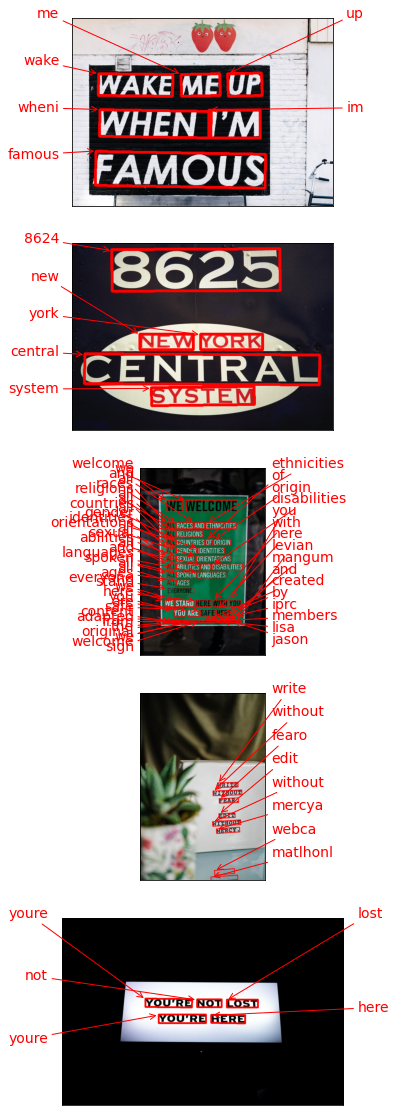

In [7]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

ÌïòÏßÄÎßå ÌïúÍµ≠Ïñ¥Î•º ÌõàÎ†®Ïù¥ ÎêòÏñ¥ÏûàÏßÄ ÏïäÏùÄ Î™®Îç∏Ïù¥Îã§.  
[korean language support Ïù¥Ïäà](https://github.com/faustomorales/keras-ocr/issues/101)

## ÌÖåÏÑúÎûôÌä∏ Ïç®Î≥¥Í∏∞
ÌÖåÏÑúÎûôÌä∏(Tesseract) ÎùºÏù¥Î∏åÎü¨Î¶¨Î°ú Ïù¥ÎØ∏ÏßÄÏóêÏÑú Î¨∏ÏûêÎ•º Ïù∏ÏãùÌï¥ Î≥¥Í≤†Îã§.  
ÌÖåÏÑúÎûôÌä∏Îäî Íµ¨Í∏ÄÏóêÏÑú ÌõÑÏõêÌïòÎäî OCR Ïò§ÌîàÏÜåÏä§ ÎùºÏù¥Î∏åÎü¨Î¶¨Î°ú ÌòÑÏû¨Îäî Î≤ÑÏ†Ñ 4ÏôÄ Tesseract.jsÎì±ÏúºÎ°ú ÌôïÏû•ÎêòÎäî Îì± ÎßéÏùÄ Í≥≥ÏóêÏÑú ÏÇ¨Ïö©ÎêòÍ≥† ÏûàÎã§.  
Î≤ÑÏ†Ñ 4ÏóêÏÑúÎäî LSTMÏù¥ ÏóîÏßÑÏóê Ï∂îÍ∞ÄÎêòÏóàÍ≥† ÌòÑÏû¨ ÌïúÍµ≠Ïñ¥Î•º Ìè¨Ìï®Ìïú 116 Í∞ú Íµ≠Ïñ¥Î•º ÏßÄÏõêÌïòÍ≥† ÏûàÎã§.

### 1) ÌÖåÏÑúÎûôÌä∏ ÏÑ§ÏπòÌïòÍ∏∞
ÌÅ¥ÎùºÏö∞Îìú ÏâòÏóêÏÑú ÏïÑÎûò ÏΩîÎìúÎ•º ÏÇ¨Ïö©Ìï¥ ÌÖåÏÑúÎûôÌä∏ Í¥ÄÎ†® Ìå®ÌÇ§ÏßÄÎì§ÏùÑ ÏÑ§ÏπòÌï¥Î≥¥Ïûê.
```
$ sudo apt install tesseract-ocr
$ sudo apt install libtesseract-dev
```

### 2) ÌÖåÏÑúÎûôÌä∏ ÌååÏù¥Ïç¨ wrapper ÏÑ§ÏπòÌïòÍ∏∞
PytesseractÎäî OSÏóê ÏÑ§ÏπòÎêú ÌÖåÏÑúÎûôÌä∏Î•º ÌååÏù¥Ïç¨ÏóêÏÑú ÏâΩÍ≤å ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù Ìï¥Ï£ºÎäî ÎûòÌçº ÎùºÏù¥Î∏åÎü¨Î¶¨(wrapper library)Ïù¥Îã§.   
ÌååÏù¥Ïç¨ ÎÇ¥ÏóêÏÑú Ïª¥Ìì®ÌÑ∞Ïóê ÏÑ§ÏπòÎêú ÌÖåÏÑúÎûôÌä∏ ÏóîÏßÑÏùò Í∏∞Îä•ÏùÑ Î∞îÎ°ú Ïì∏ Ïàò ÏûàÎèÑÎ°ù Ìï¥Ï§ÄÎã§.  
[pytesseract](https://pypi.org/project/pytesseract/)  
[wikipedia : wrapper library](https://ko.wikipedia.org/wiki/%EB%9E%98%ED%8D%BC_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC)

```
$ pip list | grep pytesseract
```

ÎßåÏïΩ ÏÑ§ÏπòÍ∞Ä Ïïà ÎêòÏñ¥ ÏûàÎã§Î©¥ ÏïÑÎûò Î™ÖÎ†πÏñ¥Î•º Ïù¥Ïö©Ìï¥ ÏÑ§ÏπòÌïòÏûê.
```
$ pip install pytesseract
```

### 3) ÌÖåÏÑúÎûôÌä∏Î°ú Î¨∏Ïûê Í≤ÄÏ∂úÌïòÍ≥† Ïù¥ÎØ∏ÏßÄ ÏûêÎ•¥Í∏∞ (detection)
ÌÖåÏÑúÎûôÌä∏Î•º ÏÇ¨Ïö©ÌïòÎ©¥ Ìïú Î≤àÏóê Ïù¥ÎØ∏ÏßÄ ÎÇ¥Ïùò Î¨∏Ïûê Í≤ÄÏ∂úÍ≥º Ïù∏ÏãùÏùÑ Ìï† Ïàò ÏûàÎã§.  
OCRÏù¥ Ïù¥Î§ÑÏßÄÎäî Ï†ÑÏ≤¥ Í≥ºÏ†ïÏùÑ ÏßÅÏ†ë Í±∞Ï≥êÎ≥¥Í∏∞ ÏúÑÌï¥ Í≤ÄÏ∂úÏùÑ Î®ºÏ†Ä Ìï¥ Î≥¥Ïûê.

In [12]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(‚Äìoem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(‚Äìpsm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # ÌïúÍµ≠Ïñ¥ÎùºÎ©¥ lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/handwriting_korean.jpg'   #ÌÖåÏä§Ìä∏Ïö© Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°úÏûÖÎãàÎã§. Î≥∏Ïù∏Ïù¥ ÏÑ†ÌÉùÌïú ÌååÏùºÎ™ÖÏúºÎ°ú Î∞îÍøîÏ£ºÏÑ∏Ïöî. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png
/aiffel/aiffel/ocr_python/0025.png
/aiffel/aiffel/ocr_python/0026.png
/aiffel/aiffel/ocr_python/0027.png
/aiffel/aiffel/ocr_p

ÏúÑÏóêÏÑú Íµ¨ÌòÑÌïú `crop_word_regions()` Ìï®ÏàòÎäî Ïó¨Îü¨Î∂ÑÏù¥ ÏÑ†ÌÉùÌïú ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄÎ•º Î∞õÏïÑÏÑú, Î¨∏Ïûê Í≤ÄÏ∂úÏùÑ ÏßÑÌñâÌïú ÌõÑ, Í≤ÄÏ∂úÎêú Î¨∏Ïûê ÏòÅÏó≠ÏùÑ cropÌïú Ïù¥ÎØ∏ÏßÄÎ°ú ÎßåÎì§Ïñ¥ Í∑∏ ÌååÏùºÎì§Ïùò listÎ•º Î¶¨ÌÑ¥ÌïòÎäî Ìï®ÏàòÏù¥Îã§.

Í∏∞Î≥∏Ï†ÅÏúºÎ°ú `pytesseract.image_to_data()` Î•º ÏÇ¨Ïö©ÌïúÎã§. ÌååÏù¥Ïç¨ÏóêÏÑú Ìé∏ÌïòÍ≤å ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú pytesseract Ïùò Output ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Í≤∞Í¥èÍ∞íÏùò ÌòïÏãùÏùÑ ÎîïÏÖîÎÑàÎ¶¨(DICT) ÌòïÏãùÏúºÎ°ú ÏÑ§Ï†ïÌï¥ Ï£ºÍ≤å ÎêúÎã§. Ïù¥Î†áÍ≤å Ïù∏ÏãùÎêú Í≤∞Í≥ºÎäî Î∞îÏö¥Îî© Î∞ïÏä§Ïùò left, top, width, height Ï†ïÎ≥¥Î•º Í∞ÄÏßÑÎã§. 
Î∞îÏö¥Îî© Î∞ïÏä§Î•º ÏÇ¨Ïö©Ìï¥ Ïù¥ÎØ∏ÏßÄÏùò Î¨∏Ïûê ÏòÅÏó≠Îì§ÏùÑ ÌååÏù¥Ïç¨ PIL(pillow) ÎòêÎäî opencv ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÇ¨Ïö©Ìï¥ ÏûòÎùº(crop)ÏÑú cropped_image_path_listÏóê Îã¥ÏïÑ Î¶¨ÌÑ¥ÌñàÎã§.

üôåüëÄ(Ï£ºÏùò) ÏúÑ ÏΩîÎìúÏóêÏÑú lang='kor' Î°ú Î∞îÍæ∏Î©¥ ÏóêÎü¨Í∞Ä Î∞úÏÉùÌïòÎ©¥, ÌÖåÏÑúÎûôÌä∏Ïùò Ïñ∏Ïñ¥Ìå©ÏùÑ ÏÑ§ÏπòÌï¥Ïïº Ï†ïÏÉÅ ÎèôÏûëÌïòÍ≤å ÎêúÎã§.

```
$ sudo apt install tesseract-ocr-kor
```

### 4) ÌÖåÏÑúÎûôÌä∏Î°ú ÏûòÎ¶∞ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Îã®Ïñ¥ Ïù∏ÏãùÌïòÍ∏∞
Ïù¥Ï†ú Î¨∏Ïûê Ïù∏ÏãùÏùÑ Ìï¥ Î≥º Ï∞®Î°ÄÏù¥Îã§.  
Í≤ÄÏ∂úÎêú Î∞îÏö¥Îî© Î∞ïÏä§ Î≥ÑÎ°ú ÏûòÎ¶∞ Ïù¥ÎØ∏ÏßÄÎ•º ÎÑ£Ïñ¥Ï£ºÎ©¥ ÏòÅÏó≠Î≥Ñ ÌÖçÏä§Ìä∏Í∞Ä Í≤∞Í¥èÍ∞íÏúºÎ°ú ÎÇòÏò§Îäî image_to_string()Î•º ÏÇ¨Ïö©ÌïòÍ≤å ÎêúÎã§.

Ïù∏ÏãùÎêú Í≤∞Í≥ºÏôÄ Ïã§Ï†úÏù¥ÎØ∏ÏßÄÎ•º ÎπÑÍµêÌï¥Î≥¥Ïûê.

In [14]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # ÌïúÍµ≠Ïñ¥ÎùºÎ©¥ lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# ÏúÑÏóêÏÑú Ï§ÄÎπÑÌïú Î¨∏Ïûê ÏòÅÏó≠ ÌååÏùºÎì§ÏùÑ Ïù∏ÏãùÌïòÏó¨ ÏñªÏñ¥ÏßÑ ÌÖçÏä§Ìä∏Î•º Ï∂úÎ†•Ìï©ÎãàÎã§.
recognize_images(cropped_image_path_list)

ÏÑúÏñ∏

|             Îì§

ÎÇ≠

Í∑∏

Í∑∏

4

Î°ú

Ï¥à

7 Í±¥

ÎÇò

Î°ú „Öã

Î°ú „Öã

Ìôà

Ï´ì

ÏÜç

ÏúºÎ£¨

|             Îì§

\Í∑∏ ÎÇú

|

-

Í∞Ä,

Ïò§Ïûê

Îäî Ïò§

„Äê

Îàî

Îäî

^

Ï§ë

Îì§

Ïñ¥Í∏∞

Ï°∞Í∞ú

|

2\Îëê

Í≥†

ÎÇò ~

^‚Äú Í∞ú

+ 40

„Ñ¥

0

ÎäêÎîò

ÎÇò

Ï¶àÏñ¥

„Ö£

^

2

0„Öú7

Îßà

\„Ñ¥+

ÎÇ®Í≤®ÏÑ†

ÏïΩÏÜç

ÎÑàÎìú ÏßÄ

ÎÖ∏

Ï°∞ÎÑà

Ïò§Ïûê

ÎÇòÏùÄ

ÏÑ∞

Ïùë

Î≥∏

Í≥†


1

ÏûàÏñ¥

Ï¶à4

| ÍΩ§ ÎÖ∏

Í≥†

]

„Ñ¥„Ñ¥

~

Îãà2 04

ÌòÄ

'

„Öã.

1

Í≥†

ÎÇò

6‚Äú

ÎãàÎìúÍ∞Ä

Îäî ~

Î£å

0

ÌÉÄÍ±∞

| Îã§Ïãú

Í±∞

ÏÑØ

Î∞ò

Í∞ú Ïö¥

^ Í∞Ä

-

Ïóê ÎÇò

Î∂Ñ

ÌÜ°Ïä§

Ïûá Í∞ú

3)

Ïò§Ï≤¥

~


6

(„ÖÖ„ÖÖ

|             Îì§

ÎÇò

|             Îì§

Ìï¥

+

0 ‚Ä¶„Ñ¥

^

„ÄçÔΩå0\

Îëê

Ìú¥

„Ö£

1

Í±∞Ïö∞

Í±¥


Í∞ÑÏùÄ

-{

Ïùò

Ï§ë 01

ÎùΩ

ÏÇø

Ï§ë

Ïàò

~

|

74

2003

Done
